In [15]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Data

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()

In [17]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [18]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [19]:
print(df.shape)
print(df.info())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [20]:
print("\nTarget Names:", iris.target_names)


Target Names: ['setosa' 'versicolor' 'virginica']


In [21]:
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])
print(df['flower_name'].value_counts())

flower_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


# Split Data

In [22]:
y = df['target']
X = df.drop(['target', 'flower_name'], axis=1, errors='ignore')


x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42 , stratify=y)

In [23]:
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (120, 4)
Test shape: (30, 4)


# Models

**Logistic Regression**

In [24]:
log_model = LogisticRegression(max_iter=100)
log_model.fit(x_train, y_train)

LogisticRegression()

In [25]:
y_pred_log = log_model.predict(x_test)

In [26]:
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log, target_names=iris.target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


**Decision Tree**

In [27]:
dt_model = DecisionTreeClassifier(criterion='entropy' , max_depth=3 , random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [28]:
y_pred_dt = dt_model.predict(x_test)

In [29]:
acc_tree = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_tree:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=iris.target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


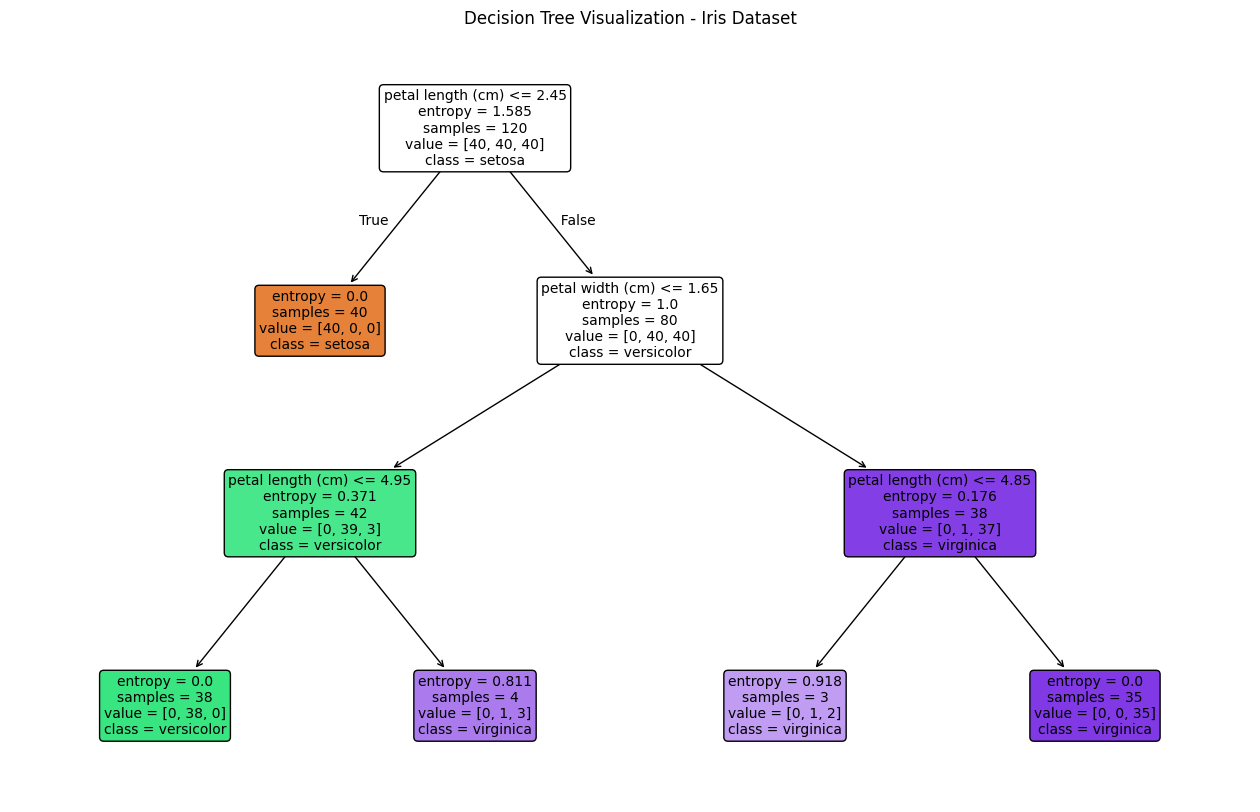

In [30]:
plt.figure(figsize=(16,10))

tree.plot_tree(
    dt_model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree Visualization - Iris Dataset")
plt.show()

# Compare

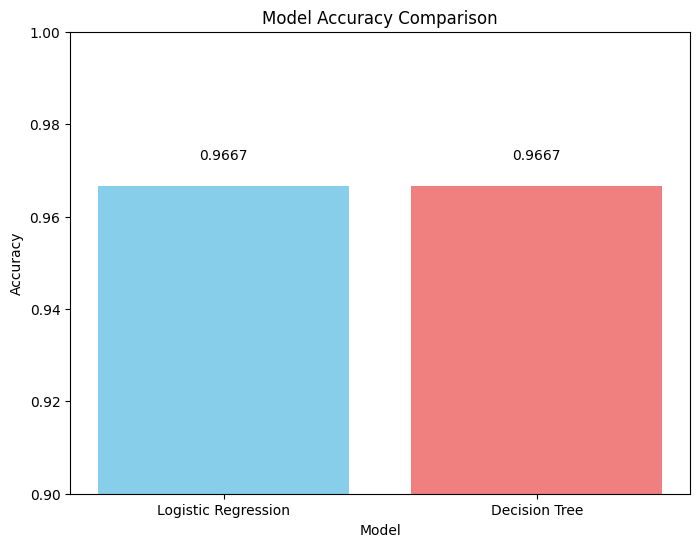

In [31]:
import matplotlib.pyplot as plt

model_names = ['Logistic Regression', 'Decision Tree']
accuracies = [acc_log, acc_tree]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.0) # Set y-axis limits to better visualize differences

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f'{acc:.4f}', ha='center', va='bottom')

plt.show()

# Interactive CLI

In [33]:
import numpy as np

def predict_flower_species():
    print("\n🌸 Welcome to the Iris Flower Classifier 🌸")
    print("You can enter measurements to predict the flower species.")
    print("Type 'exit' anytime to stop.\n")

    while True:
        try:
            sepal_length = input("Sepal length (cm): ")
            if sepal_length.lower() == 'exit': break

            sepal_width = input("Sepal width (cm): ")
            if sepal_width.lower() == 'exit': break

            petal_length = input("Petal length (cm): ")
            if petal_length.lower() == 'exit': break

            petal_width = input("Petal width (cm): ")
            if petal_width.lower() == 'exit': break

            sample = np.array([[
                float(sepal_length),
                float(sepal_width),
                float(petal_length),
                float(petal_width)
            ]])

            prediction = log_model.predict(sample)[0]
            flower_name = iris.target_names[prediction]

            print(f"🌼 Predicted Species: {flower_name}\n")

        except ValueError:
            print("⚠️ Invalid input! Please enter numeric values only.\n")

    print("👋 Exiting the program. Have a nice day!\n")

predict_flower_species()



🌸 Welcome to the Iris Flower Classifier 🌸
You can enter measurements to predict the flower species.
Type 'exit' anytime to stop.

Sepal length (cm): 5.1
Sepal width (cm): 3.5
Petal length (cm): 1.4
Petal width (cm): 0.2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


🌼 Predicted Species: setosa

Sepal length (cm): 6.2
Sepal width (cm): 2.8
Petal length (cm): 4.8
Petal width (cm): 1.8


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


🌼 Predicted Species: virginica

Sepal length (cm): exit
👋 Exiting the program. Have a nice day!

